In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('F:/Data Science projects/by_me/indiantrains/All_Indian_Trains.csv')
df.columns

Index(['Unnamed: 0', 'Train no.', 'Train name', 'Starts', 'Ends'], dtype='object')

In [3]:
df.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
0,0,12723,Andhra Pradesh Express,Hyderabad Decan,New Delhi
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan
3,3,12707,Andhra Pradesh Sampark Kranti,Tirupati,H Nizamuddin
4,4,15909,Abadh Assam Express,New Tinsukia Junction,Darbhanga Junction


In [46]:
df.shape

(4024, 5)

In [53]:
#total unique trains
len(df['Train name'].unique())

2970

In [21]:

#entire data of index 0
df.loc[0]
#or by
df.iloc[0]

Unnamed: 0                         0
Train no.                      12723
Train name    Andhra Pradesh Express
Starts               Hyderabad Decan
Ends                       New Delhi
Name: 0, dtype: object

In [23]:
df.loc[0,'Train name']
#df.iloc[0,2]

'Andhra Pradesh Express'

In [25]:
#data of first 5 trains with their train no and train name
df.loc[0:5,'Train no.':'Train name']
#df.loc[[0,1,2,3,4],'Train no.':'Train name']

,Train no.,Train name
0,12723,Andhra Pradesh Express
1,22416,Andhra Pradesh Express
2,12724,Andhra Pradesh Express
3,12707,Andhra Pradesh Sampark Kranti
4,15909,Abadh Assam Express
5,18242,Abkp Durg Passenger E


In [62]:
#create a func to calc all express trains
def count(col_name,keyword):
    list1=list(df[col_name])
    return (len(set([feature for feature in list1 if keyword in feature])))
    

In [63]:
count('Train name','Express')

1634

In [29]:
#alternatew way,find all express trains
df['Train name'].str.contains('Express').sum()

2397

In [45]:
#total diff express trains
len(set(express_train))

1634

In [48]:
#find all special trains
list1=list(df['Train name'])
special_train=[feature for feature in list1 if 'Special' in feature]
len(special_train)

850

In [50]:
#total diff special trains
len(set(special_train))

686

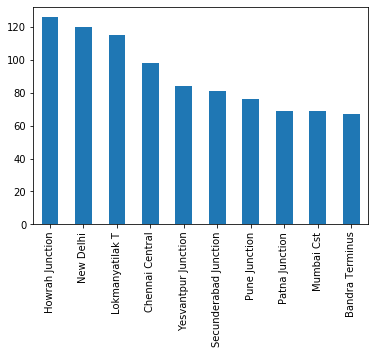

In [6]:
df['Starts'].value_counts().nlargest(10).plot.bar()


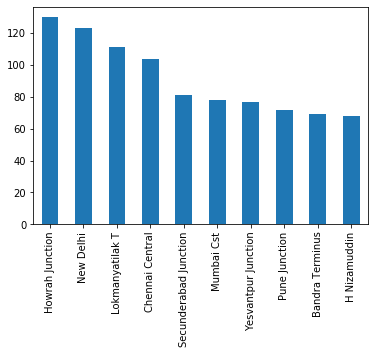

In [7]:
df['Ends'].value_counts().nlargest(10).plot.bar()

In [8]:
#filtering all data where train is intercity express
filt=df['Train name']=='Intercity Express'
df_inter=df[filt]
df_inter.shape

(45, 5)

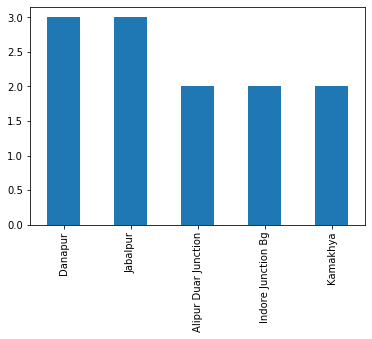

In [9]:
#5 source stations with max frequency of a train
df_inter['Starts'].value_counts().nlargest(5).plot.bar()

In [10]:
#filtering all data where train starts from howrah junction
df_howrah=df[df['Starts']=='Howrah Junction']
df_howrah.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
50,50,12341,Agnibina Express,Howrah Junction,Asansol Junction
154,154,18047,Amaravathi Express,Howrah Junction,Vasco Da Gama
174,174,13049,Amritsar Express,Howrah Junction,Amritsar Junction
176,176,13005,Amritsar Mail,Howrah Junction,Amritsar Junction
285,285,12130,Azad Hind Express,Howrah Junction,Pune Junction


In [11]:
df_howrah['Starts'].value_counts().nlargest(5)

Howrah Junction    126
Name: Starts, dtype: int64

In [13]:
city=df['Starts'].value_counts().nlargest(10)
city

Howrah Junction          126
New Delhi                120
Lokmanyatilak T          115
Chennai Central           98
Yesvantpur Junction       84
Secunderabad Junction     81
Pune Junction             76
Patna Junction            69
Mumbai Cst                69
Bandra Terminus           67
Name: Starts, dtype: int64

In [14]:
#filtering all data where train ends at new delhi
df_end_delhi=df[df['Ends']=='New Delhi']
df_end_delhi.shape


(123, 5)

In [15]:
df_end_delhi['Starts'].unique()

array(['Hyderabad Decan', 'Ajmer Junction', 'Allahabad Junction',
       'Amritsar Junction', 'Bhubaneswar', 'Mumbai Central', 'Bhagalpur',
       'Darbhanga Junction', 'Barauni Junction', 'Varanasi Junction',
       'Bilaspur Junction', 'Bhatinda Junction', 'Chandigarh',
       'Kanpur Central', 'Dibrugarh', 'Dibrugarh Town', 'Dehradun',
       'Lucknow Nr', 'Chennai Central', 'Howrah Junction', 'Agra Cantt',
       'Bareilly', 'Jammu Tawi', 'Jabalpur', 'Ranchi', 'Jalandhar City',
       'Kalka', 'Bangalore Cy Junction', 'Trivandrum Cntl', 'Kolkata',
       'Kamakhya', 'Ludhiana Junction', 'Lucknow Ne', 'Lal Kuan',
       'Islampur', 'Gaya Junction', 'Madgaon', 'Puri', 'Sealdah',
       'Una Himachal', 'Sainagar Shirdi', 'Shmata V D Ktra', 'Moga',
       'Habibganj', 'Malda Town', 'Naharlagun', 'New Jalpaiguri',
       'Puducherry', 'Patna Junction', 'Guwahati', 'Silchar',
       'Rjndr Ngr Bihar', 'Rohtak Junction', 'Manduadih', 'Rajgir',
       'Ahmedabad Junction', 'Udhampur', 'Vis

In [16]:
#all trains name whose destination is new delhi,and origin is howrah
filt=(df['Starts']=='Howrah Junction') & (df['Ends']=='New Delhi')
df_howrah_delhi=df[filt]
df_howrah_delhi.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
1452,515,12323,Hwh Ndls Express,Howrah Junction,New Delhi
1453,516,12249,Hwh Ndls Yuva E,Howrah Junction,New Delhi
1987,83,12301,Kolkata Rajdhni,Howrah Junction,New Delhi
1988,84,12305,Kolkata Rajdhani,Howrah Junction,New Delhi
2540,636,12273,Ndls Duronto,Howrah Junction,New Delhi


In [71]:
#create a function that will grab data where destination is new delhi,and origin is howrah
def dataframe(df,source_name,destination):
    filt=(df['Starts']==source_name) & (df['Ends']==destination)
    df_output=df[filt]
    return (df_output.head())
    

In [73]:
dataframe(df,'Howrah Junction','New Delhi')

,Unnamed: 0,Train no.,Train name,Starts,Ends
1452,515,12323,Hwh Ndls Express,Howrah Junction,New Delhi
1453,516,12249,Hwh Ndls Yuva E,Howrah Junction,New Delhi
1987,83,12301,Kolkata Rajdhni,Howrah Junction,New Delhi
1988,84,12305,Kolkata Rajdhani,Howrah Junction,New Delhi
2540,636,12273,Ndls Duronto,Howrah Junction,New Delhi


In [18]:
#whose start is either new delhi or mumbai
filt_3=(df['Starts']=='New Delhi') | (df['Starts']=='Mumbai Central')
df_nd_mumbai=df[filt_3]
df_nd_mumbai.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan
21,21,12931,Adi Double Deck,Mumbai Central,Ahmedabad Junction
22,22,12267,Adi Duronto Express,Mumbai Central,Ahmedabad Junction
35,35,12958,Adi Sj Rajdhani,New Delhi,Ahmedabad Junction


In [19]:

#whose start is either either delhi or mumbai but ends at lucknow
filt_4=((df['Starts']=='New Delhi') | (df['Starts']=='Mumbai Central')) & (df['Ends']=='Lucknow Nr')
df_nd_mum_lko=df[filt_4]
df_nd_mum_lko

,Unnamed: 0,Train no.,Train name,Starts,Ends
1240,303,12420,Gomti Express,New Delhi,Lucknow Nr
2148,244,12272,Lko Duronto Express,New Delhi,Lucknow Nr
2260,356,12230,Lucknow Mail,New Delhi,Lucknow Nr
2574,670,2234,Ndls Lko Ac Special,New Delhi,Lucknow Nr
2575,671,4440,Ndls Lko Ac Special,New Delhi,Lucknow Nr
2576,672,4934,Ndls Lko Premiu,New Delhi,Lucknow Nr
2577,673,4944,Ndls Lko Premiu,New Delhi,Lucknow Nr
2578,674,12430,Ndls Lko Raj,New Delhi,Lucknow Nr
2579,675,4434,Ndls Lko Special,New Delhi,Lucknow Nr
2580,676,4942,Ndls Lko Special,New Delhi,Lucknow Nr


In [65]:
df['Train no.']=df['Train no.'].astype(str)

In [67]:
#find all trains start from 12 as they are superfast trains
df['Train no.'].str.contains('12').sum()

1056